In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import json
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json('data/data.json')
dataWIKIPEDIA = pd.read_json('data/wikipedia/wikipedia.json')
dataWIKIDaTA = pd.read_json('data/wikidata/wikidata.json')

1 - Percentage of missing values

In [81]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage.round(2).sort_values())

id                         0.00
Last Revision Date         0.00
Total Revisions            0.00
Overview                   0.03
Specialty                 21.45
Alias                     24.18
Diagnosis                 42.36
Treatment                 48.60
Symptoms                  52.44
Causes                    75.07
Genetic Associations      77.13
Treatments List           85.51
Symptoms List             89.71
Prevention                89.98
Caused By                 93.72
Medical Exams             95.78
Different From            95.90
Anatomical Location       97.09
Risk factors              97.53
Transmission Processes    98.04
Can Cause                 98.66
Risk Factors List         98.99
Complications             98.99
dtype: float64


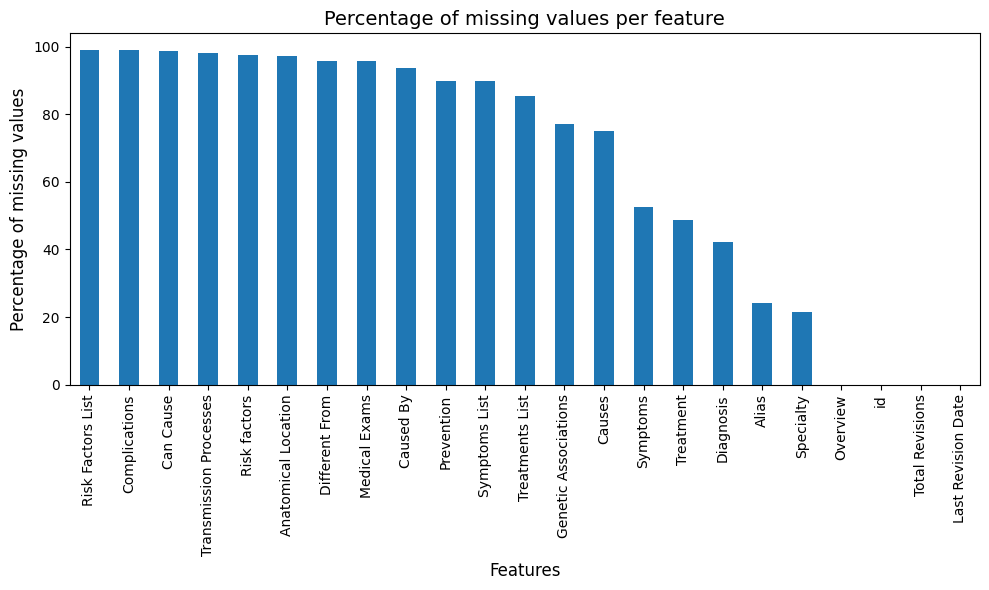

In [82]:
missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage.round(2).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of missing values per feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of missing values', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

2 - Mean words per feature

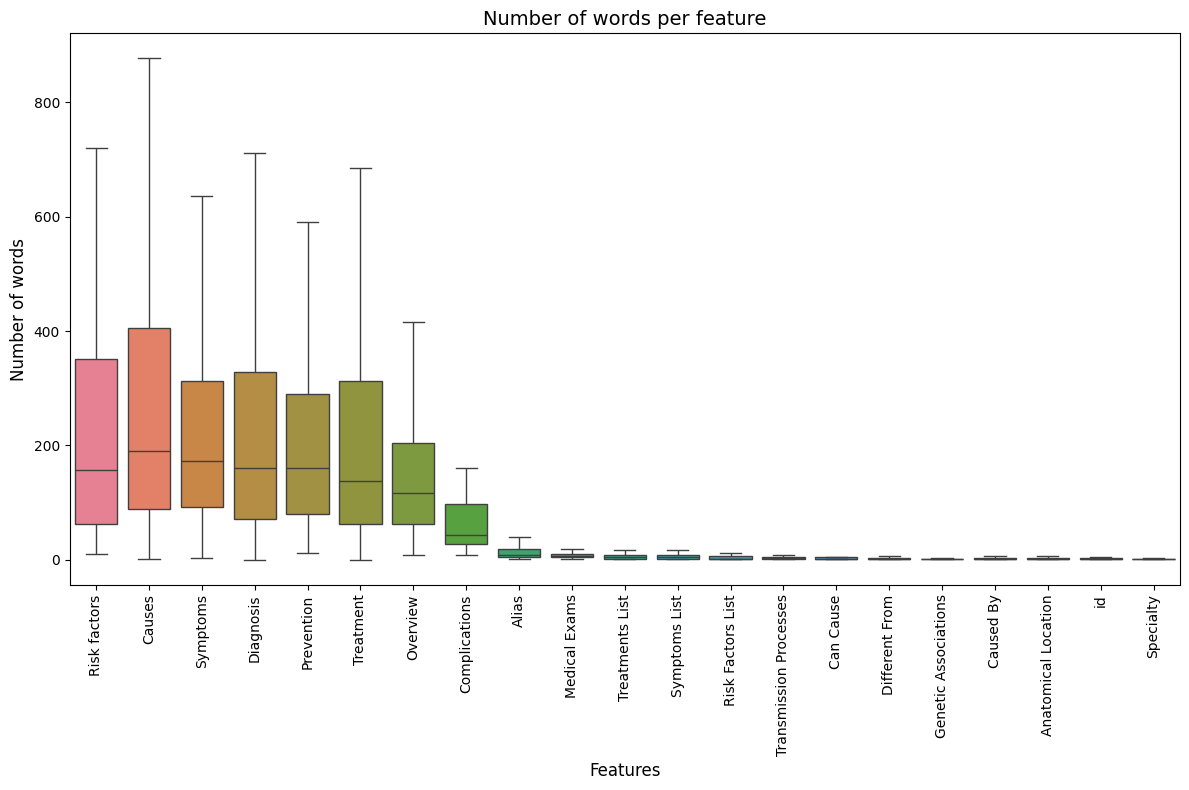

In [83]:
def count_words(x):
    if isinstance(x, list):
        return sum(count_words(item) for item in x)
    elif isinstance(x, dict):
        return sum(count_words(v) for v in x.values())
    else:
        return len(str(x).split())

number_words = data.drop(columns=['Total Revisions', 'Last Revision Date']).apply(
    lambda col: col.dropna().apply(count_words)
)

number_words_mean = number_words.apply(lambda col: col.dropna().mean())
number_words_sorted = number_words[number_words_mean.sort_values(ascending=False).index]

plt.figure(figsize=(12, 8))
sns.boxplot(data=number_words_sorted, showfliers=False)
plt.title('Number of words per feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of words', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


3 -  Frquency of Values in Total Revisions

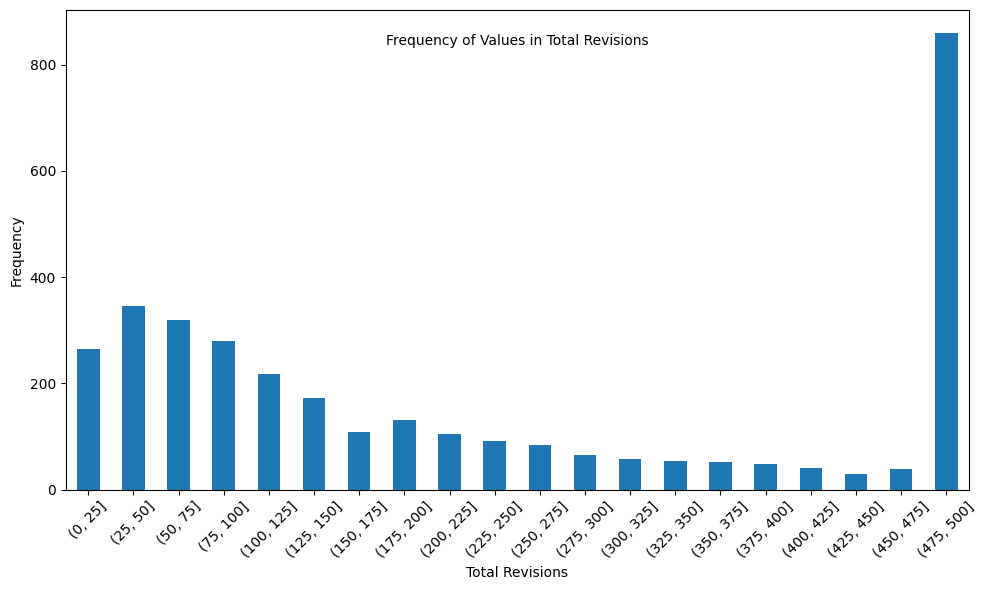

In [ ]:
import json

with open('data/data.json', encoding='utf-8') as f:
    data = json.load(f)

total_revisions = []

for disease_entry in data:
    if "Total Revisions" in disease_entry and isinstance(disease_entry["Total Revisions"], (int, float)):
        total_revisions.append(disease_entry["Total Revisions"])

if total_revisions:
    total_revisions_series = pd.Series(total_revisions)
    bins = range(0, int(total_revisions_series.max()) + 25, 25)
    binned_revisions = pd.cut(total_revisions_series, bins=bins)
    value_counts = binned_revisions.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title("Frequency of Values in Total Revisions", fontsize=10, y=0.91)
    plt.xlabel("Total Revisions")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No valid 'Total Revisions' data available for plotting.")


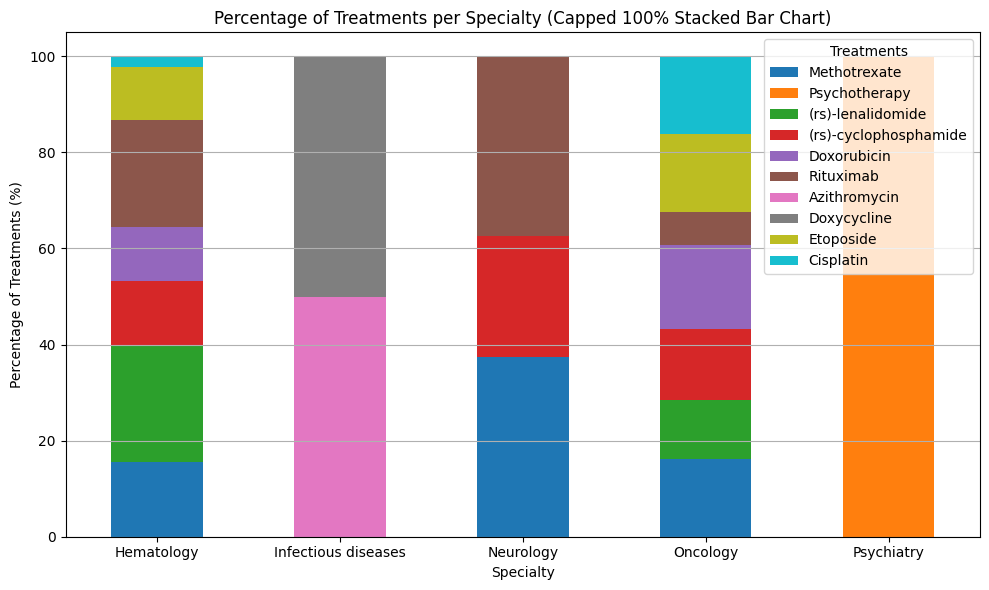

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

with open('data/data.json', encoding='utf-8') as f:
    data = json.load(f)

rows = []
for disease_entry in data:
    disease = disease_entry.get("id", "Unknown Disease")
    specialties = disease_entry.get("Specialty", [])
    treatments = disease_entry.get("Treatments List", [])    
    if not specialties or not treatments:
        continue
    for treatment in treatments:
        for specialty in specialties:
            rows.append({'Disease': disease, 'Treatment': treatment, 'Specialty': specialty})

df = pd.DataFrame(rows)
treatment_counts = df.groupby(['Specialty', 'Treatment']).size().unstack(fill_value=0)

max_specialties = 5
max_treatments = 10

top_specialties = treatment_counts.sum(axis=1).nlargest(max_specialties).index
valid_specialties = treatment_counts.index.intersection(top_specialties)
top_treatments = treatment_counts.loc[valid_specialties].sum(axis=0).nlargest(max_treatments).index
treatment_counts_capped = treatment_counts.loc[valid_specialties, top_treatments]
if not treatment_counts_capped.empty:
    treatment_counts_percentage = treatment_counts_capped.div(treatment_counts_capped.sum(axis=1), axis=0) * 100
    treatment_counts_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
    plt.title('Percentage of Treatments per Specialty (Capped 100% Stacked Bar Chart)')
    plt.xlabel('Specialty')
    plt.ylabel('Percentage of Treatments (%)')
    plt.xticks(rotation=360)
    plt.grid(axis='y')
    plt.legend(title='Treatments')
    plt.tight_layout()
    plt.show()
else:
    print("No valid specialties or treatments available for plotting.")